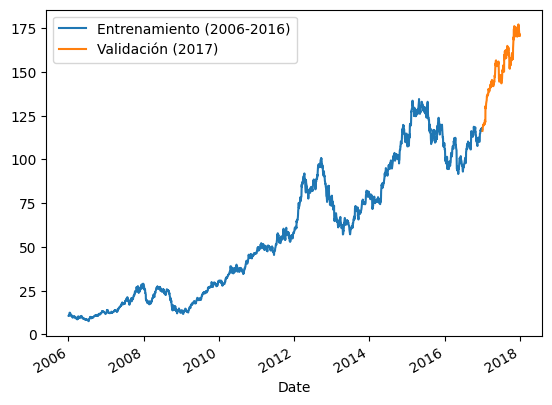

Epoch 1/20


c:\Users\ninic\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0227
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0011
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.0870e-04
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.2455e-04
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.8171e-04
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.3831e-04
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.4444e-04
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.0527e-04
Epoch 9/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.7402e-04
Epoch 10/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.7954e-04
Epoch 11/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.5670e-04
Epoch 12/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.9571e-04
Epoch 13/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.3639e-04
Epoch 14/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.6357e-04
Epoch 15/20
85/85 ━━━━━━━━━━━━━━━━

c:\Users\ninic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

#
# Funciones auxiliares
#
def graficar_predicciones(real, prediccion):
    plt.plot(real[0:len(prediccion)],color='red', label='Valor real de la acción')
    plt.plot(prediccion, color='blue', label='Predicción de la acción')
    plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la acción')
    plt.legend()
    plt.show()

#
# Lectura de los datos
#
dataset = pd.read_csv(r'C:\Users\ninic\OneDrive - Lambton College\Term 1\BDM 1113-NoSQL data Base\project\Project-Data-Analysis-Lambton\AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

#
# Sets de entrenamiento y validación 
# La LSTM se entrenará con datos de 2016 hacia atrás. La validación se hará con datos de 2017 en adelante.
# En ambos casos sólo se usará el valor más alto de la acción para cada día
#
set_entrenamiento = dataset[:'2016'].iloc[:,1:2]
set_validacion = dataset['2017':].iloc[:,1:2]

set_entrenamiento['High'].plot(legend=True)
set_validacion['High'].plot(legend=True)
plt.legend(['Entrenamiento (2006-2016)', 'Validación (2017)'])
plt.show()

# Normalización del set de entrenamiento
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#
# Red LSTM
#
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))
modelo.compile(optimizer='rmsprop', loss='mse')
modelo.fit(X_train,Y_train,epochs=20,batch_size=32)


#
# Validación (predicción del valor de las acciones)
#
x_test = set_validacion.values
x_test = sc.transform(x_test)







set de valoracion len: 251
X test: 251
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[37.196884]
 [37.24033 ]
 [37.324806]
 [37.63862 ]
 [37.945236]
 [37.933163]
 [38.065964]
 [37.913845]
 [37.99111 ]
 [38.14082 ]
 [38.2036  ]
 [38.1046  ]
 [38.191532]
 [38.278465]
 [38.107018]
 [38.590008]
 [38.67213 ]
 [38.650387]
 [38.476494]
 [38.418533]
 [40.617203]
 [40.351337]
 [40.302998]
 [40.619617]
 [41.003944]
 [41.03537 ]
 [41.08855 ]
 [41.20942 ]
 [41.42216 ]
 [41.729195]
 [42.014492]
 [41.925034]
 [41.90811 ]
 [42.13055 ]
 [42.220013]
 [42.307056]
 [42.108788]
 [42.297382]
 [42.297382]
 [42.95268 ]
 [42.984116]
 [42.8753  ]
 [42.86079 ]
 [42.91157 ]
 [42.86804 ]
 [42.623814]
 [42.76165 ]
 [42.77857 ]
 [42.831768]
 [43.09777 ]
 [43.163063]
 [43.158222]
 [43.279137]
 [43.59351 ]
 [43.303318]
 [43.298485]
 [43.337177]
 [43.21143 ]
 [43.89338 ]
 [44.002205]
 [44.004627]
 [43.949005]
 [43.912727]
 [44.098938]
 [44.23679 ]
 [44.00946 ]
 [43.927242]
 [43.854687]
 [43.72652 ]
 [43.43632 ]
 [43.491943]


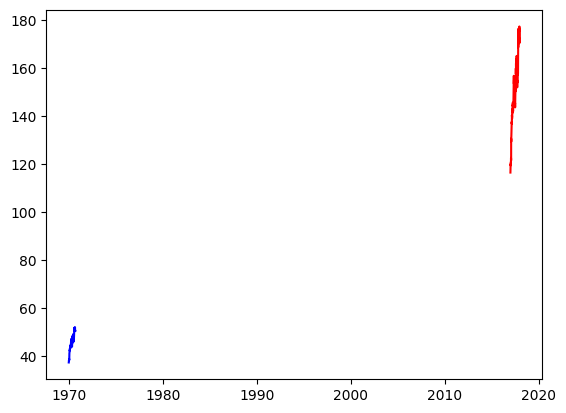

In [5]:
X_test = []
for i in range( len(x_test) ):
    X_test.append(x_test[i:i+1,0])
    #print(i - time_step)
    #print(X_test)
#print(x_test)
#print(len(x_test))
#print(len(X_test))


#for i in range(len(x_test)):
    #X_test.append(x_test[i,0])
X_test = np.array(X_test)
#print(X_test.shape)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

print("set de valoracion len:", len(set_validacion))
print("X test:", len(X_test))
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)
print(prediccion)

#plt.plot(real[0:len(prediccion)],color='red', label='Valor real de la acción')
plt.plot(prediccion, color='blue', label='Predicción de la acción')
plt.plot(set_validacion, color='red', label='Predicción de la acción')

#print(set_validacion)
# Graficar resultados
#graficar_predicciones(set_validacion.values,prediccion)